In [66]:
import pandas as pd
import sklearn
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
matplotlib.pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [67]:
df = pd.read_csv('testset.csv')
print(df.columns)
print(len(df))
# print(df.info())
# df.head()


Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')
100990


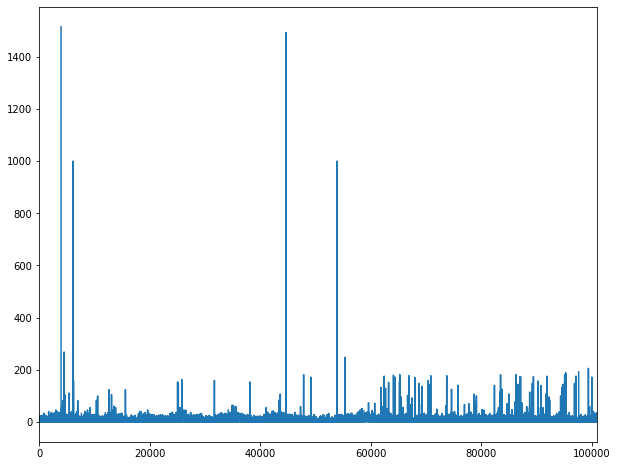

In [68]:
df[' _wspdm'].plot()

# New features

In [69]:
df['datetime'] = pd.to_datetime(df['datetime_utc']) 

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.week
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df['night']   = df.apply(lambda x: 1 if (x['datetime'].hour >= 20 and x['datetime'].hour < 24 ) or (x['datetime'].hour >= 0 and x['datetime'].hour < 5) else 0, axis=1)
df['morning'] = df.apply(lambda x: 1 if (x['datetime'].hour >= 5 and x['datetime'].hour < 10 ) else 0, axis=1)
df['noon']    = df.apply(lambda x: 1 if (x['datetime'].hour >= 10 and x['datetime'].hour < 16 ) else 0, axis=1)
df['evening'] = df.apply(lambda x: 1 if (x['datetime'].hour >= 16 and x['datetime'].hour < 20 ) else 0, axis=1)

In [70]:
df['hour_cos'] = np.cos(df['hour'] * 2*np.pi/24)
df['hour_sin'] = np.sin(df['hour'] * 2*np.pi/24)
df['month_cos'] = np.cos(df['month'] * 2*np.pi/12)
df['month_sin'] = np.sin(df['month'] * 2*np.pi/12)
df['week_cos'] = np.cos(df['week'] * 2*np.pi/53)
df['week_sin'] = np.sin(df['week'] * 2*np.pi/53)

# Filter

In [71]:
df_fil = df.copy()

df_fil = df_fil[df_fil['datetime'].dt.year.isin(range(2000, 2011))]

df_fil = df_fil[df_fil[' _tempm'] < 60]

In [72]:
filter_cols = [' _conds', ' _dewptm', ' _fog', ' _hail', ' _hum', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado']
#df_fil = df_fil[filter_cols]
df_fil[' _pressurem'] = df_fil[' _pressurem'].replace(-9999, np.nan)

In [73]:
df_fil.dropna(inplace=True, subset=filter_cols)

drop_cols = [' _heatindexm', ' _precipm' , ' _wdird', ' _wdire', ' _wgustm', ' _windchillm', 'datetime_utc']

df_fil = df_fil.drop(drop_cols, axis=1)

In [74]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60811 entries, 17670 to 79422
Data columns (total 29 columns):
 _conds        60811 non-null object
 _dewptm       60811 non-null float64
 _fog          60811 non-null int64
 _hail         60811 non-null int64
 _hum          60811 non-null float64
 _pressurem    60811 non-null float64
 _rain         60811 non-null int64
 _snow         60811 non-null int64
 _tempm        60811 non-null float64
 _thunder      60811 non-null int64
 _tornado      60811 non-null int64
 _vism         58120 non-null float64
 _wspdm        59654 non-null float64
datetime       60811 non-null datetime64[ns]
year           60811 non-null int64
month          60811 non-null int64
week           60811 non-null int64
day            60811 non-null int64
hour           60811 non-null int64
night          60811 non-null int64
morning        60811 non-null int64
noon           60811 non-null int64
evening        60811 non-null int64
hour_cos       60811 non-null float64

In [75]:
df = df_fil

In [76]:
print([c for c in df_fil.columns if c not in drop_cols])

[' _conds', ' _dewptm', ' _fog', ' _hail', ' _hum', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wspdm', 'datetime', 'year', 'month', 'week', 'day', 'hour', 'night', 'morning', 'noon', 'evening', 'hour_cos', 'hour_sin', 'month_cos', 'month_sin', 'week_cos', 'week_sin']


# Remove outliers

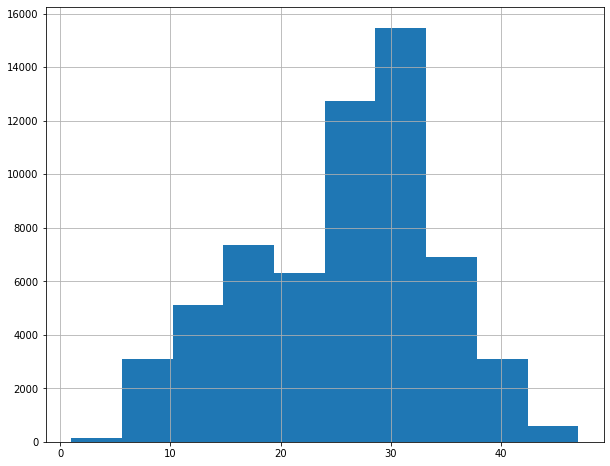

In [77]:
df[' _tempm'].hist()

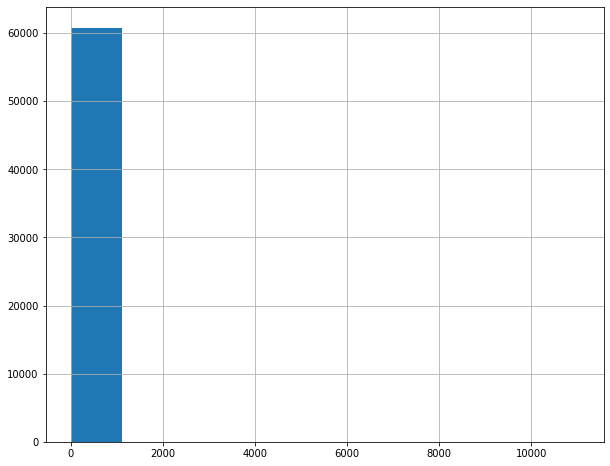

In [78]:
df[' _pressurem'].hist()

In [79]:
float_col = df.columns[df.dtypes.values == np.dtype(np.float)]

In [80]:
float_col

Index([' _dewptm', ' _hum', ' _pressurem', ' _tempm', ' _vism', ' _wspdm',
       'hour_cos', 'hour_sin', 'month_cos', 'month_sin', 'week_cos',
       'week_sin'],
      dtype='object')

In [81]:
df[float_col] = df[float_col].mask((df[float_col] - df[float_col].mean()).abs() > 3 * df[float_col].std())

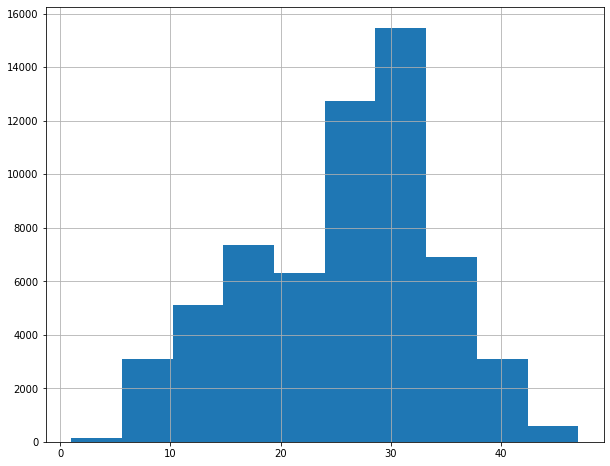

In [82]:
df[' _tempm'].hist()

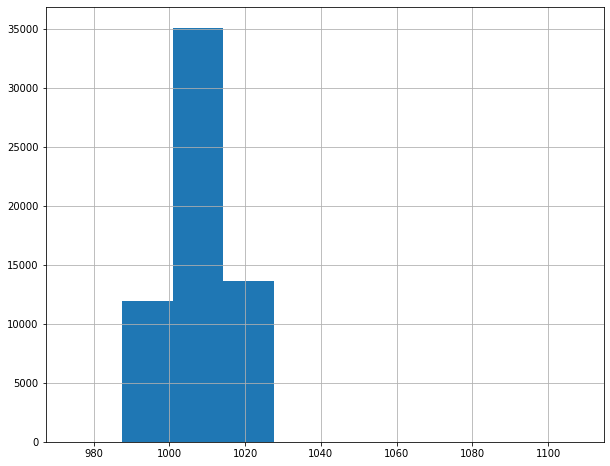

In [83]:
df[' _pressurem'].hist()

In [84]:
df.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm,datetime,year,month,week,day,hour,night,morning,noon,evening,hour_cos,hour_sin,month_cos,month_sin,week_cos,week_sin
17670,Fog,7.0,1,0,100.0,1017.0,0,0,7.0,0,0,NaN,0.0,2000-01-01 00:30:00,2000,1,52,1,0,1,0,0,0,1.000000,0.000000,0.866025,0.5,0.992981,-0.118273
17671,Fog,8.0,1,0,100.0,1017.0,0,0,8.0,0,0,NaN,0.0,2000-01-01 01:30:00,2000,1,52,1,1,1,0,0,0,0.965926,0.258819,0.866025,0.5,0.992981,-0.118273
17672,Fog,9.0,1,0,100.0,1018.0,0,0,9.0,0,0,NaN,0.0,2000-01-01 02:30:00,2000,1,52,1,2,1,0,0,0,0.866025,0.500000,0.866025,0.5,0.992981,-0.118273
17673,Fog,8.0,1,0,93.0,1019.0,0,0,9.0,0,0,NaN,0.0,2000-01-01 03:30:00,2000,1,52,1,3,1,0,0,0,0.707107,0.707107,0.866025,0.5,0.992981,-0.118273
17674,Fog,10.0,1,0,100.0,1020.0,0,0,10.0,0,0,NaN,0.0,2000-01-01 04:30:00,2000,1,52,1,4,1,0,0,0,0.500000,0.866025,0.866025,0.5,0.992981,-0.118273


# Missing Data

Index([' _conds', ' _dewptm', ' _fog', ' _hail', ' _hum', ' _pressurem',
       ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado', ' _vism',
       ' _wspdm', 'datetime', 'year', 'month', 'week', 'day', 'hour', 'night',
       'morning', 'noon', 'evening', 'hour_cos', 'hour_sin', 'month_cos',
       'month_sin', 'week_cos', 'week_sin'],
      dtype='object')


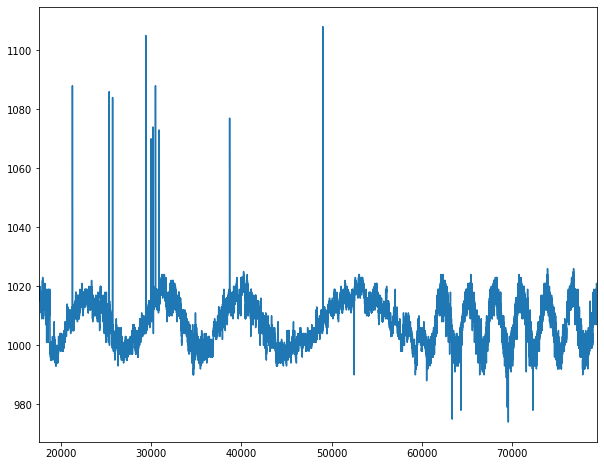

In [85]:
dfays = df[(df['year']>=2000) & (df['year']<=2010)]
print(dfays.columns)
dfays.interpolate(inplace=True)
dfays[' _pressurem'].plot()

In [86]:
dfays.at[list(range(17670, 17676)), ' _vism'] = [0.322, 0.322, 0.322, 0.322, 0.322,0.222]

In [87]:
df = dfays

# Normalization

In [88]:
scaler= MinMaxScaler()

In [89]:
con_col = df.columns[df.dtypes.values == np.dtype(np.float)]
con_col = con_col.drop(' _tempm')
print(con_col)

Index([' _dewptm', ' _hum', ' _pressurem', ' _vism', ' _wspdm', 'hour_cos',
       'hour_sin', 'month_cos', 'month_sin', 'week_cos', 'week_sin'],
      dtype='object')


In [90]:
df[con_col] = scaler.fit_transform(df[con_col])

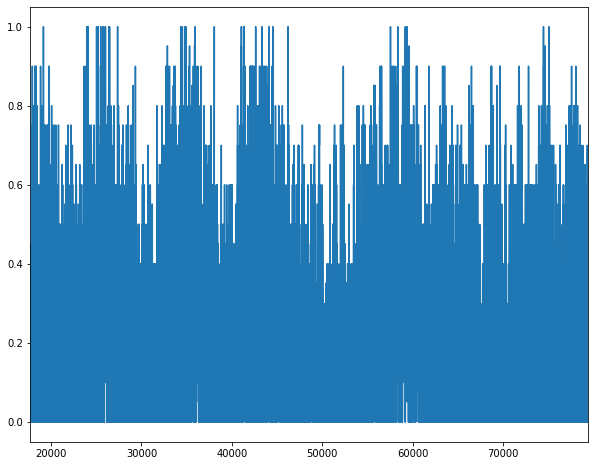

In [91]:
df[' _wspdm'].plot()

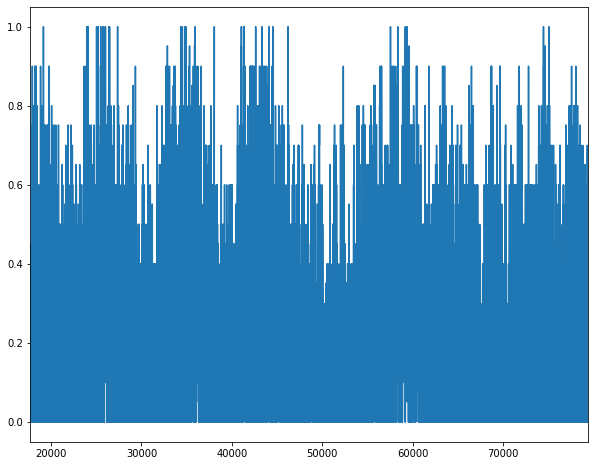

In [92]:
df[' _wspdm'].plot()

In [93]:
df.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm,datetime,year,month,week,day,hour,night,morning,noon,evening,hour_cos,hour_sin,month_cos,month_sin,week_cos,week_sin
17670,Fog,0.317073,1,0,1.000000,0.320896,0,0,7.0,0,0,0.005367,0.0,2000-01-01 00:30:00,2000,1,52,1,0,1,0,0,0,1.000000,0.500000,0.933013,0.75,0.996487,0.440837
17671,Fog,0.341463,1,0,1.000000,0.320896,0,0,8.0,0,0,0.005367,0.0,2000-01-01 01:30:00,2000,1,52,1,1,1,0,0,0,0.982963,0.629410,0.933013,0.75,0.996487,0.440837
17672,Fog,0.365854,1,0,1.000000,0.328358,0,0,9.0,0,0,0.005367,0.0,2000-01-01 02:30:00,2000,1,52,1,2,1,0,0,0,0.933013,0.750000,0.933013,0.75,0.996487,0.440837
17673,Fog,0.341463,1,0,0.927083,0.335821,0,0,9.0,0,0,0.005367,0.0,2000-01-01 03:30:00,2000,1,52,1,3,1,0,0,0,0.853553,0.853553,0.933013,0.75,0.996487,0.440837
17674,Fog,0.390244,1,0,1.000000,0.343284,0,0,10.0,0,0,0.005367,0.0,2000-01-01 04:30:00,2000,1,52,1,4,1,0,0,0,0.750000,0.933013,0.933013,0.75,0.996487,0.440837


# For each day part, get mean row

In [94]:
df_night = df[df['night'] == 1].groupby([df['datetime'].dt.date, ' _conds']).mean()
df_morning = df[df['morning'] == 1].groupby([df['datetime'].dt.date, ' _conds']).mean()
df_noon = df[df['noon'] == 1].groupby([df['datetime'].dt.date, ' _conds']).mean()
df_evening = df[df['evening'] == 1].groupby([df['datetime'].dt.date, ' _conds']).mean()

In [95]:
df_night = df_night.reset_index().drop_duplicates(['datetime', 'night'])
df_morning = df_morning.reset_index().drop_duplicates(subset=['datetime', 'morning'])
df_noon = df_noon.reset_index().drop_duplicates(subset=['datetime', 'noon'])
df_evening = df_evening.reset_index().drop_duplicates(subset=['datetime', 'evening'])

In [96]:
#df_night.drop(['index'], axis=1)
df_night

,datetime,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm,year,month,week,day,hour,night,morning,noon,evening,hour_cos,hour_sin,month_cos,month_sin,week_cos,week_sin
0,2000-01-01,Fog,0.368564,1.0,0.0,0.964120,0.325871,0.0,0.0,9.666667,0.0,0.0,0.005245,0.000000,2000.0,1.0,52.0,1.0,10.666667,1.0,0.0,0.0,0.0,0.893229,0.500000,0.933013,0.750000,0.996487,0.440837
1,2000-01-02,Fog,0.365854,1.0,0.0,0.857143,0.319829,0.0,0.0,11.285714,0.0,0.0,0.006667,0.093050,2000.0,1.0,52.0,2.0,12.714286,1.0,0.0,0.0,0.0,0.919358,0.387633,0.933013,0.750000,0.996487,0.440837
3,2000-01-03,Fog,0.327913,1.0,0.0,0.893519,0.316750,0.0,0.0,9.111111,0.0,0.0,0.005976,0.089189,2000.0,1.0,1.0,3.0,10.666667,1.0,0.0,0.0,0.0,0.893229,0.500000,0.933013,0.750000,0.996487,0.559163
4,2000-01-04,Fog,0.341463,1.0,0.0,0.923611,0.315920,0.0,0.0,9.222222,0.0,0.0,0.003182,0.050450,2000.0,1.0,1.0,4.0,10.666667,1.0,0.0,0.0,0.0,0.893229,0.500000,0.933013,0.750000,0.996487,0.559163
5,2000-01-05,Fog,0.320122,1.0,0.0,0.955729,0.321828,0.0,0.0,7.750000,0.0,0.0,0.006364,0.087838,2000.0,1.0,1.0,5.0,9.125000,1.0,0.0,0.0,0.0,0.882012,0.516176,0.933013,0.750000,0.996487,0.559163
6,2000-01-06,Fog,0.310105,1.0,0.0,0.927083,0.312367,0.0,0.0,7.857143,0.0,0.0,0.007035,0.171815,2000.0,1.0,1.0,6.0,12.857143,1.0,0.0,0.0,0.0,0.908006,0.402427,0.933013,0.750000,0.996487,0.559163
8,2000-01-07,Fog,0.317073,1.0,0.0,1.000000,0.306903,0.0,0.0,7.000000,0.0,0.0,0.004375,0.037838,2000.0,1.0,1.0,7.0,11.625000,1.0,0.0,0.0,0.0,0.898188,0.455806,0.933013,0.750000,0.996487,0.559163
9,2000-01-08,Fog,0.390244,1.0,0.0,0.962500,0.289552,0.0,0.0,10.600000,0.0,0.0,0.007667,0.221081,2000.0,1.0,1.0,8.0,18.000000,1.0,0.0,0.0,0.0,0.853906,0.353407,0.933013,0.750000,0.996487,0.559163
10,2000-01-09,Fog,0.406504,1.0,0.0,0.937500,0.283582,0.0,0.0,11.666667,0.0,0.0,0.011111,0.284685,2000.0,1.0,1.0,9.0,1.000000,1.0,0.0,0.0,0.0,0.971992,0.626470,0.933013,0.750000,0.996487,0.559163
13,2000-01-10,Fog,0.414634,1.0,0.0,1.000000,0.283582,0.0,0.0,11.000000,0.0,0.0,0.013333,0.000000,2000.0,1.0,2.0,10.0,0.000000,1.0,0.0,0.0,0.0,1.000000,0.500000,0.933013,0.750000,0.985999,0.617495


In [97]:
d = pd.concat([df_night, df_morning, df_noon, df_evening])
# d = d.sort_values(['datetime', 'night', 'morning', 'noon', 'evening'], ascending=False).reset_index()
d = d.sort_values(['datetime', 'night', 'morning', 'noon', 'evening'], ascending=[True] + [False]*4).reset_index(drop=True)
#d.drop(['index'], axis=1)

In [98]:
d

,datetime,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm,year,month,week,day,hour,night,morning,noon,evening,hour_cos,hour_sin,month_cos,month_sin,week_cos,week_sin
0,2000-01-01,Fog,0.368564,1.0,0.0,0.964120,0.325871,0.0,0.0,9.666667,0.0,0.0,0.005245,0.000000,2000.0,1.0,52.0,1.0,10.666667,1.0,0.0,0.0,0.0,0.893229,0.500000,0.933013,0.75,0.996487,0.440837
1,2000-01-01,Fog,0.439024,1.0,0.0,0.906250,0.335821,0.0,0.0,13.500000,0.0,0.0,0.005183,0.000000,2000.0,1.0,52.0,1.0,5.500000,0.0,1.0,0.0,0.0,0.564705,0.991481,0.933013,0.75,0.996487,0.440837
2,2000-01-01,Fog,0.451220,1.0,0.0,0.937500,0.320896,0.0,0.0,13.500000,0.0,0.0,0.006389,0.000000,2000.0,1.0,52.0,1.0,14.500000,0.0,0.0,1.0,0.0,0.106717,0.198223,0.933013,0.75,0.996487,0.440837
3,2000-01-01,Fog,0.420732,1.0,0.0,0.984375,0.324627,0.0,0.0,11.500000,0.0,0.0,0.005833,0.000000,2000.0,1.0,52.0,1.0,17.500000,0.0,0.0,0.0,1.0,0.437500,0.025265,0.933013,0.75,0.996487,0.440837
4,2000-01-02,Fog,0.365854,1.0,0.0,0.857143,0.319829,0.0,0.0,11.285714,0.0,0.0,0.006667,0.093050,2000.0,1.0,52.0,2.0,12.714286,1.0,0.0,0.0,0.0,0.919358,0.387633,0.933013,0.75,0.996487,0.440837
5,2000-01-02,Fog,0.414634,1.0,0.0,0.812500,0.335821,0.0,0.0,14.000000,0.0,0.0,0.003519,0.000000,2000.0,1.0,52.0,2.0,6.000000,0.0,1.0,0.0,0.0,0.500000,1.000000,0.933013,0.75,0.996487,0.440837
6,2000-01-02,Fog,0.402439,1.0,0.0,0.968750,0.320896,0.0,0.0,11.000000,0.0,0.0,0.008333,0.075676,2000.0,1.0,52.0,2.0,14.000000,0.0,0.0,1.0,0.0,0.081742,0.258519,0.933013,0.75,0.996487,0.440837
7,2000-01-02,Fog,0.384146,1.0,0.0,0.861979,0.324627,0.0,0.0,12.000000,0.0,0.0,0.008333,0.100676,2000.0,1.0,52.0,2.0,17.500000,0.0,0.0,0.0,1.0,0.437500,0.025265,0.933013,0.75,0.996487,0.440837
8,2000-01-03,Fog,0.327913,1.0,0.0,0.893519,0.316750,0.0,0.0,9.111111,0.0,0.0,0.005976,0.089189,2000.0,1.0,1.0,3.0,10.666667,1.0,0.0,0.0,0.0,0.893229,0.500000,0.933013,0.75,0.996487,0.559163
9,2000-01-03,Smoke,0.365854,0.0,0.0,0.614583,0.318408,0.0,0.0,16.000000,0.0,0.0,0.016111,0.217117,2000.0,1.0,1.0,3.0,7.333333,0.0,1.0,0.0,0.0,0.339012,0.945505,0.933013,0.75,0.996487,0.559163


In [99]:
def create_bars(df):
    float_col = [' _dewptm', ' _hum',' _pressurem', ' _vism',' _wspdm']
    for col in float_col:
        bars_column = []
        low_q = df[col].quantile(q = 0.025)
        high_q = df[col].quantile(q = 0.975)
        bar_len = (high_q-low_q)/20
        bars = [low_q+ i*bar_len for i in range(20)]
        for name,value in df[col].iteritems():
            index = 0
            for i, b in enumerate(bars):
                index = i
                if value < b:
                    break
            bars_column.append(index)
        df['{}_bars'.format(col)] = bars_column
    return df

d = create_bars(d)

In [100]:
df_night = d[d['night'] == 1]
df_morning = d[d['morning'] == 1]
df_noon = d[d['noon'] == 1]
df_evening = d[d['evening'] == 1]

In [101]:
def label(df):
    df.loc[df[' _tempm']<10, 'Temp'] = 0
    for i in range(10):
        df.loc[(10 + i*3 <= df[' _tempm']) & (df[' _tempm'] < 13 + 3*i), 'Temp'] = i + 1
    df.loc[(40 <= df[' _tempm']), 'Temp'] = i + 1
    return df

df_night = label(df_night)
df_morning = label(df_morning)
df_noon = label(df_noon)
df_evening = label(df_evening)
d = label(d)

/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [102]:
def train_test(df):
    return df[df['year']<2010], df[df['year']==2010]

df_train, df_test = train_test(d)
df_night_train, df_night_test = train_test(df_night)
df_morning_train, df_morning_test = train_test(df_morning)
df_noon_train, df_noon_test = train_test(df_noon)
df_evening_train, df_evening_test = train_test(df_evening)

In [104]:
for dff, n in [(df_train, '../weather_data/df_full{}.csv'), 
             (df_night_train, '../weather_data/df_night{}.csv'), 
             (df_morning_train, '../weather_data/df_morning{}.csv'), 
             (df_noon_train, '../weather_data/df_noon{}.csv'), 
             (df_evening_train, '../weather_data/df_evening{}.csv')]:
    dff.to_csv(n.format('_train'), index=False)
    

for dff, n in [(df_test, '../weather_data/df_full{}.csv'), 
             (df_night_test, '../weather_data/df_night{}.csv'), 
             (df_morning_test, '../weather_data/df_morning{}.csv'), 
             (df_noon_test, '../weather_data/df_noon{}.csv'), 
             (df_evening_test, '../weather_data/df_evening{}.csv')]:
    dff.to_csv(n.format('_test'), index=False)